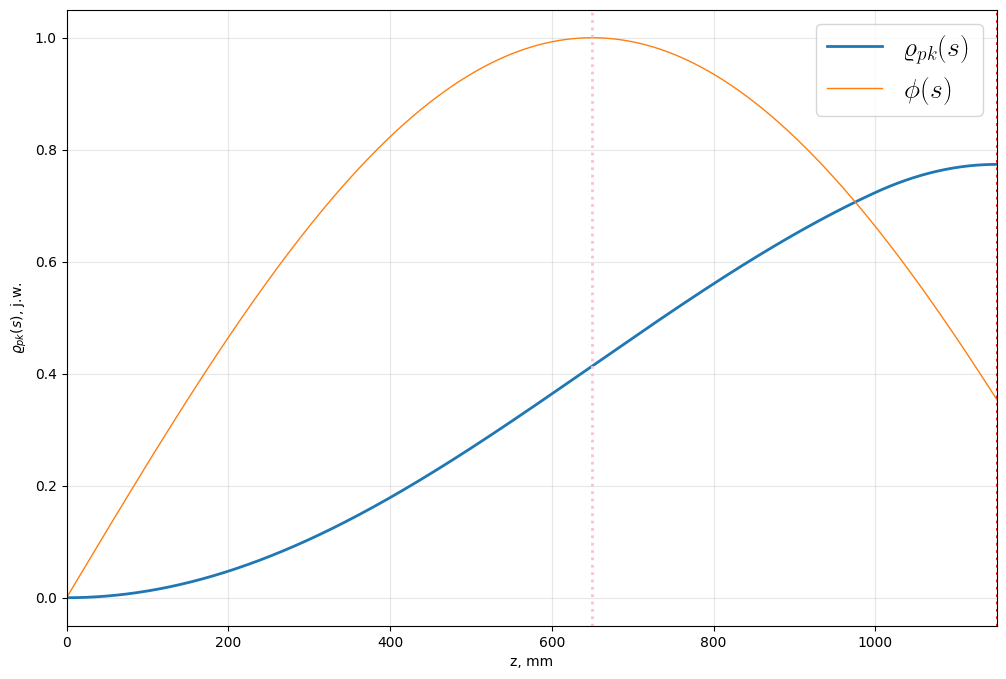

In [ ]:
# ===============================================
# Wykres funkcji ρ_pk(z) wg definicji piecewise
# ===============================================
from __future__ import annotations
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize=20)
plt.rcParams.update({
    'font.size': 20,
    'text.usetex': True,
    'text.latex.preamble': r'''
        \usepackage[bb=boondox]{mathalfa}
        \usepackage[polish]{babel}
        \usepackage[utf8]{inputenc}
        \usepackage{polski}'''
})

# --- stałe ---
H = 1.3   # m
L = 1.000 # m


SHIFT_MM = (H/2) * 1000.0  

#//////////////////////////////////
RHO_MAX_USER = 2  # $
#//////////////////////////////////
Kroczki = RHO_MAX_USER / 0.13
if isinstance(Kroczki, int):
   KROKI = Kroczki
else:
   KROKI = math.ceil(Kroczki)
#//////////////////////////////////

def rho_pk_from0_vec(z, H, L):
    z = np.asarray(z, dtype=float)
    y = np.zeros_like(z)
    pi_over_H = np.pi / H

    m2 = (z > -H/2) & (z <= -H/2 + L)
    m3 = (z > (-H/2 + L)) & (z <= H/2)
    m4 = (z > H/2) & (z <= H/2 + L)
    m5 = (z > H/2 + L)

    y[m2] = (H/np.pi) * (np.sin(pi_over_H * (z[m2])) + 1.0)
    y[m3] = (H/np.pi) * (np.sin(pi_over_H * (z[m3]))
                         - np.sin(pi_over_H * (z[m3] - L)))
    y[m4] = (H/np.pi) * (1.0 - np.sin(pi_over_H * (z[m4] - L)))
    y[m5] = 0.0
    return y

def phi_from_top(s, H):
    """Strumień wzdłuż osi liczonej od GÓRY rdzenia (s=0 na górnej krawędzi)."""
    s = np.asarray(s, dtype=float)
    out = np.zeros_like(s)
    m11 = (s >= -H/2) & (s <= -H/2 + L)
    m12 = (s > (-H/2 + L)) & (s <= H/2)
    out[m11] = np.cos((np.pi / H) * (s[m11]))
    out[m12] = np.cos((np.pi / H) * (s[m12]))
    return out

# --- siatka i wartości (W MM NA OSI) ---
z_mm  = np.linspace(-1000, 1800, 2001)
z_mm2 = np.linspace(-1000, 1800, 2001)

# w metrach na wejście funkcji
z_m  = z_mm / 1000.0
rpk  = rho_pk_from0_vec(z_m, H, L)
rpk2 = phi_from_top(z_m, H)

# --- PRZESUNIĘCIE OSI X ---
x_mm  = z_mm  + SHIFT_MM
x_mm2 = z_mm2 + SHIFT_MM

# φ pokazujemy tylko w rdzeniu: x ∈ [0, H] (po przesunięciu)
mask_phi = (x_mm2 >= 0.0) & (x_mm2 <= H * 1000.0)

# --- rysowanie ---
ax.plot(x_mm, rpk,               lw=2, label=r"$\varrho_{pk}(s)$")
ax.plot(x_mm2[mask_phi], rpk2[mask_phi], lw=1, label=r"$\phi(s)$")

# linie pomocnicze po przesunięciu osi:
center_mm = SHIFT_MM                 
drop_mm   = 1150    
ax.axvline(center_mm, color='pink', lw=2, ls=':')


ax.axvline(drop_mm, color='red', lw=2, ls=':')


ax.set_xlabel("z, mm")                   
ax.set_ylabel(r"$\varrho_{pk}(s)$, j.w.")
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1150)
ax.legend()


ax.set_xlim(left=0)

plt.show()
